In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
def manhattan_distance(x1,y1,x2,y2):
    return math.fabs(x1-x2) + math.fabs(y1-y2)

In [3]:
def assignLabels(datapoints, centroids, labels):
    x1c = centroids[0][0]
    y1c = centroids[0][1]
    
    x2c = centroids[1][0]
    y2c = centroids[1][1]
    
    idx = 0
    for points in datapoints:
        x = points[0]
        y = points[1]
        
        dist1 = manhattan_distance(x,y,x1c,y1c)
        dist2 = manhattan_distance(x,y,x2c,y2c)
        
        if(dist1 <= dist2):
            labels[idx] = 1
        else:
            labels[idx] = 2
        
        idx+=1;
    return 

In [4]:
def getNewCentroids(datapoints , labels):
    len1 = 0
    len2 = 0
    
    x1_sum = 0
    y1_sum = 0
    
    x2_sum = 0
    y2_sum = 0
    
    idx = 0
    for points in datapoints:
        x = points[0]
        y = points[1]
        
        if(labels[idx] == 1):
            len1 += 1
            x1_sum += x
            y1_sum += y
        else:
            len2 += 1
            x2_sum += x
            y2_sum += y
        
        idx += 1
        
    new_x1c = x1_sum / len1
    new_y1c = y1_sum / len1
    
    new_x2c = x2_sum / len2
    new_y2c = y2_sum / len2
    
    new_c1 = (new_x1c , new_y1c)
    new_c2 = (new_x2c , new_y2c)
    
    return (new_c1 , new_c2)

In [5]:
def KMeans(datapoints , centroids , old_labels , labels):
    while labels != old_labels:
        old_labels = labels.copy()
        
        assignLabels(datapoints , centroids , labels)
        print("After assigning labels",labels)
        
        new_centroids = getNewCentroids(datapoints , labels)
        centroids[0] = new_centroids[0]
        centroids[1] = new_centroids[1]
        print("Updated Centroids:",centroids)

        print("Old labels",old_labels)
        print("Labels",labels)
    return centroids

After assigning labels [1, 1, 1, 1, 2, 1, 2, 2]
Updated Centroids: [(0.148, 0.712), (0.24666666666666667, 0.20000000000000004)]
Old labels [0, 0, 0, 0, 0, 0, 0, 0]
Labels [1, 1, 1, 1, 2, 1, 2, 2]
After assigning labels [1, 1, 1, 1, 2, 2, 2, 2]
Updated Centroids: [(0.1225, 0.765), (0.2475, 0.275)]
Old labels [1, 1, 1, 1, 2, 1, 2, 2]
Labels [1, 1, 1, 1, 2, 2, 2, 2]
After assigning labels [1, 1, 1, 1, 2, 2, 2, 2]
Updated Centroids: [(0.1225, 0.765), (0.2475, 0.275)]
Old labels [1, 1, 1, 1, 2, 2, 2, 2]
Labels [1, 1, 1, 1, 2, 2, 2, 2]


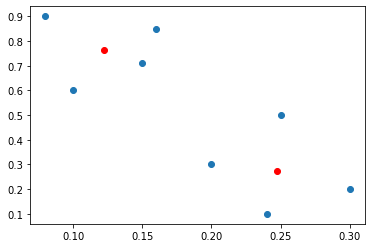

In [6]:
datapoints = [
  (0.1,0.6),
  (0.15,0.71),
  (0.08,0.9),
  (0.16, 0.85),
  (0.2,0.3),
  (0.25,0.5),
  (0.24,0.1),
  (0.3,0.2)
]

centroids = [
  (0.1,0.6),
  (0.3,0.2)
]

labels = [0]*8
old_labels = [-1]*8

new_centroids = KMeans(datapoints , centroids , old_labels , labels)

x = [d[0] for d in datapoints]
y = [d[1] for d in datapoints]

xc = [c[0] for c in new_centroids]
yc = [c[1] for c in new_centroids]

plt.scatter(x,y)
plt.scatter(xc,yc,color="red")
plt.show()